<a href="https://colab.research.google.com/github/syarifahannisa1215/kecerdasan-buatan/blob/main/ulasan_duolingo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google_play_scraper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import Sort, reviews
import time

total_reviews = 1000
all_reviews = []
next_token = None

while len(all_reviews) < total_reviews:
    count = min(200, total_reviews - len(all_reviews))

    result, next_token = reviews(
        'com.duolingo',
        lang='id',
        country='id',
        sort=Sort.NEWEST,
        count=count,
        continuation_token=next_token
    )

    all_reviews.extend(result)
    time.sleep(1)

    if not next_token:
        break

print(f"Total ulasan diambil: {len(all_reviews)}")


Total ulasan diambil: 1000


In [ ]:
import pandas as pd

df = pd.DataFrame(all_reviews)
df.to_csv('ulasan_duolingo_1000.csv', index=False)
print("File CSV berhasil disimpan dengan nama 'ulasan_duolingo_1000.csv'")


File CSV berhasil disimpan dengan nama 'ulasan_duolingo_1000.csv'


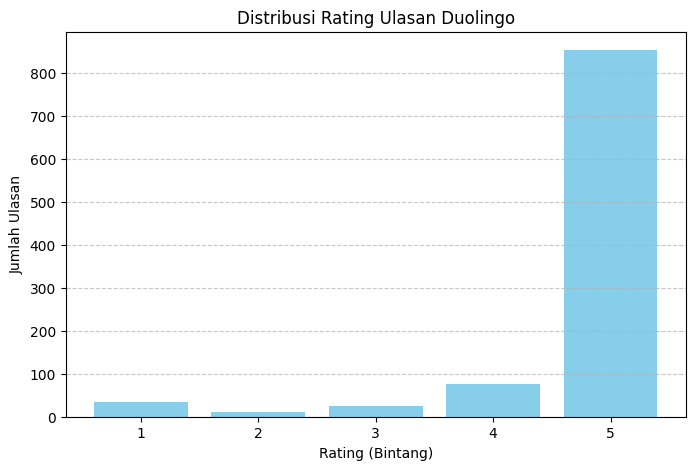

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ulasan_duolingo_1000.csv')

rating_counts = df['score'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Rating (Bintang)')
plt.ylabel('Jumlah Ulasan')
plt.title('Distribusi Rating Ulasan Duolingo')
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
